In [95]:
import pandas as pd, numpy as np
import re
from matplotlib import pyplot as plt

In [96]:
def parse(file_path, pattern="Accuracy Score"):
    scores = []
    count = 0
    print (file_path)
    with open(file_path, 'r') as f:
        line = f.readline()
        while line:
            count = count + 1
            # print ("count : {0}".format(count))
            match = re.search(pattern + "\s*:* (\d*.\d*)", line)
            
            if match:
                score = float(match.group(1))
                # print ("score : {0}".format(score))
                scores.append(score)
            line = f.readline()

    return scores

In [97]:
xgboost_scores = parse("./results/XGBoost/xgboost_output.txt")
svc_scores = parse("./results/svc/svc_output.txt")
neural_network_scores = parse("./results/neural_network/neural_network_output.txt")

./results/XGBoost/xgboost_output.txt
./results/svc/svc_output.txt
./results/neural_network/neural_network_output.txt


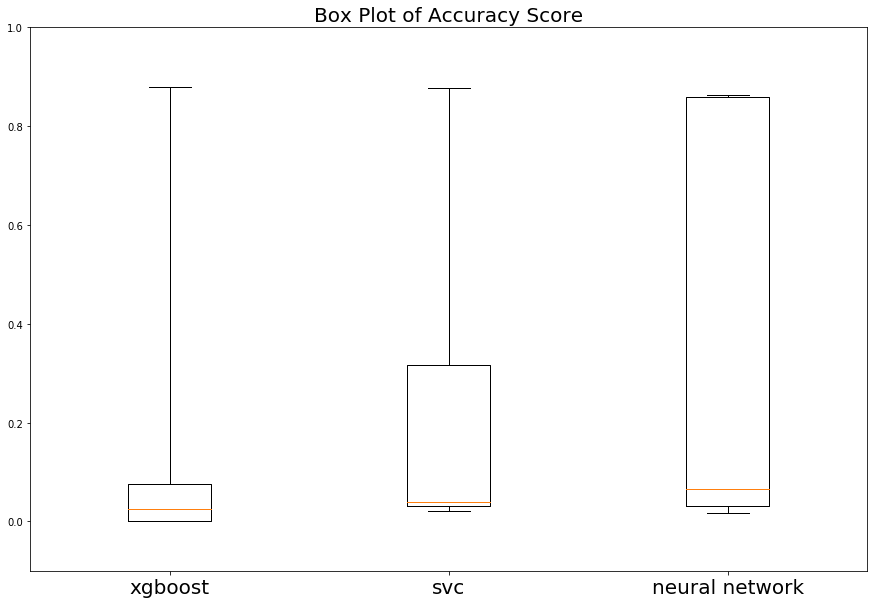

In [99]:
fig = plt.figure(figsize=[15,10])
ax = plt.axes()
plt.boxplot([xgboost_scores, svc_scores, neural_network_scores], whis='range',\
            usermedians=[0.024210444278385725, 0.03926197570479028, 0.06511743051130295])
plt.ylim(-0.1, 1)
plt.title("Box Plot of Accuracy Score", fontsize=20)
ax.set_xticklabels(['xgboost', 'svc', 'neural network'], fontsize=20)
fig.savefig('./box_plot_accuracy.png')
#plt.show()

In [80]:
xgboost_mse = parse("./results/XGBoost/xgboost_output.txt", "Mean Absolute Error")
prophet_mse = parse("./results/prophet/prophet_output.txt", "Metric mse")
multi_regression_mse = parse("./results/multi_regression/multi_regression_output.txt", "The MSE of prediction is")

./results/XGBoost/xgboost_output.txt
./results/prophet/prophet_output.txt
./results/multi_regression/multi_regression_output.txt


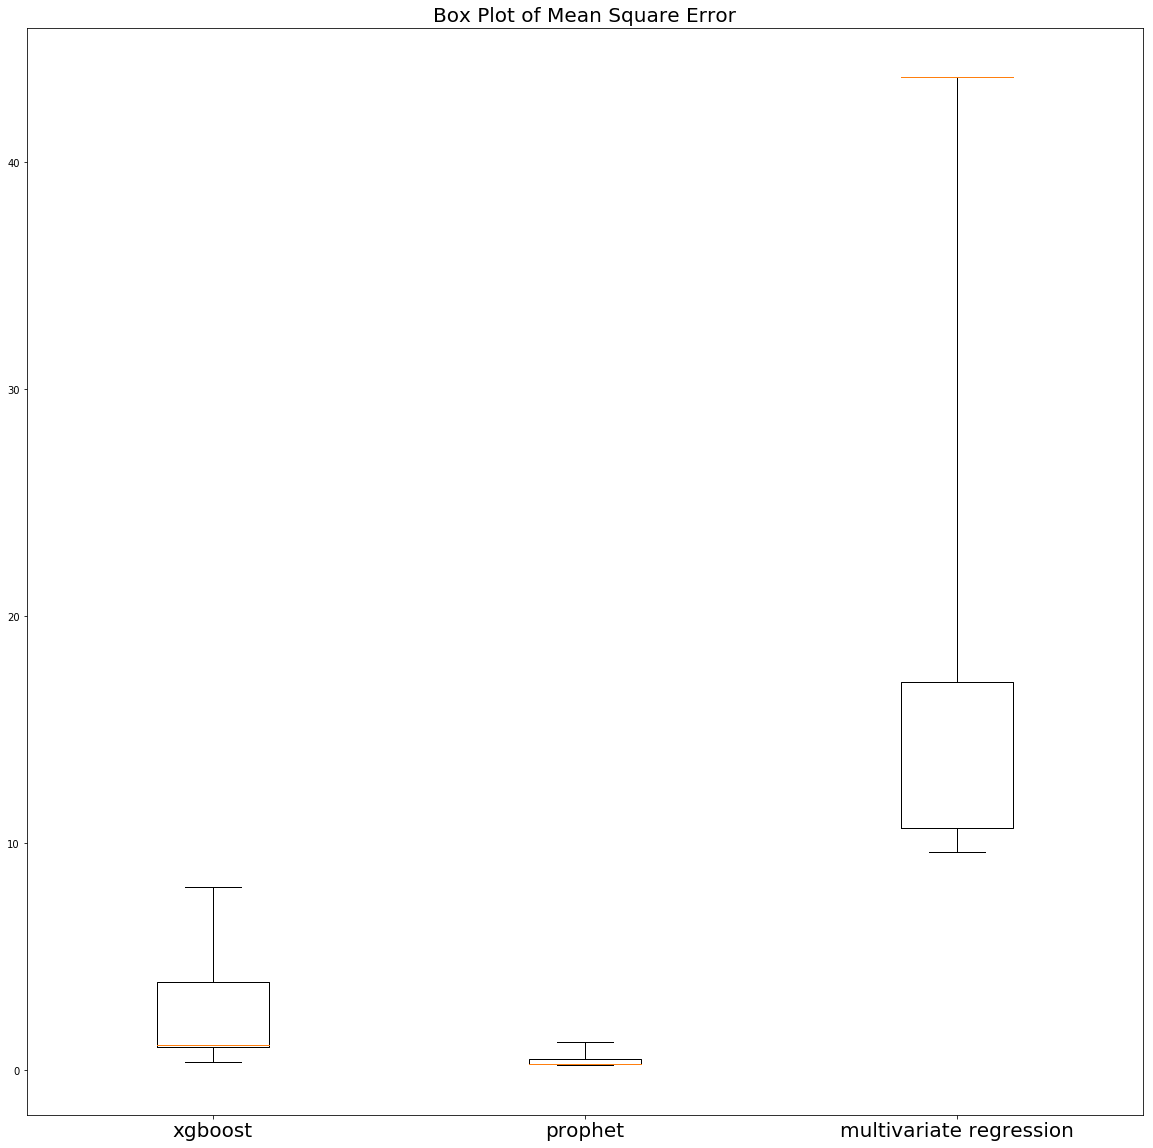

In [100]:
fig = plt.figure(figsize=[20,20])
ax = plt.axes()
plt.boxplot([xgboost_mse, prophet_mse, multi_regression_mse], whis='range',\
            usermedians=[1.1064039558425396, 0.29742817421625595, 43.75182238704884])
#plt.ylim(-0.1, 2)
plt.title("Box Plot of Mean Square Error", fontsize=20)
ax.set_xticklabels(['xgboost', 'prophet', 'multivariate regression'], fontsize=20)
fig.savefig("./box_plot_mse.png")
#plt.show()